## Telecom Churn - Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

This project is based on the Indian and Southeast Asian market.

In this project, we will use the **usage-based definition** to define churn - Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define **high-value customers** based on the above definition and **predict churn only on high-value customers**.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

### Business objective 

- To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
-  To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Preparation and Deriving new features

Let's have a look at the columns in the dataset - from the problem statement given, we know that we have data for 4 months corresponding to every mobile number - June, July, Aug, September

In [7]:
telecom.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

To make the naming convention uniform across all the columns - let's change the last 4 column names to follow the 6, 7, 8, 9 convention for the respective months

In [8]:
telecom.rename(columns={'jun_vbc_3g': 'vbc_3g_6'}, inplace=True)
telecom.rename(columns={'jul_vbc_3g': 'vbc_3g_7'}, inplace=True)
telecom.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)
telecom.rename(columns={'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [9]:
telecom.columns.values[-4:]

array(['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'], dtype=object)

#### Filter high-value customers

According to the problem statement, the high value customers are defined as: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase) <br><br>
The first 2 months in this case are June and July (part of the 'Good Phase')

Before we go ahead with filtering, let's have a look at the columns that are of our interest

In [10]:
# let's first extract all columns related to recharge
recharge_columns =  telecom.columns[telecom.columns.str.contains('rech')]

print(recharge_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [11]:
# Checking for share of missing values in this dataset
telecom.loc[:, recharge_columns].isnull().sum()/len(telecom)

total_rech_num_6            0.000000
total_rech_num_7            0.000000
total_rech_num_8            0.000000
total_rech_num_9            0.000000
total_rech_amt_6            0.000000
total_rech_amt_7            0.000000
total_rech_amt_8            0.000000
total_rech_amt_9            0.000000
max_rech_amt_6              0.000000
max_rech_amt_7              0.000000
max_rech_amt_8              0.000000
max_rech_amt_9              0.000000
date_of_last_rech_6         0.016070
date_of_last_rech_7         0.017670
date_of_last_rech_8         0.036220
date_of_last_rech_9         0.047600
date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
total_rech_data_6           0.748467
total_rech_data_7           0.744287
total_rech_data_8           0.736607
total_rech_data_9           0.740777
max_rech_data_6             0.748467
max_rech_data_7             0.744287
max_rech_data_8             0.736607
m

We observe that approximately 75% values for last recharge date, total recharge, max recharge, and average recharge amount for mobile internet data is missing.

The colums of interest for us in order to identify the high-value customers is the 'av_rech_amt_data' columns. We observe from above that there are some missing values in these columns. The columns that are in direct relation to these are the 'total_rech_data' columns. What we need to check now is are the null values consistent across both these columns

In [12]:
# check how many av_rech_amt_data is NA
isna_avg_rech_amt_6 = telecom['av_rech_amt_data_6'] == np.nan
isna_avg_rech_amt_7 = telecom['av_rech_amt_data_7'] == np.nan
isna_avg_rech_amt_8 = telecom['av_rech_amt_data_8'] == np.nan
isna_avg_rech_amt_9 = telecom['av_rech_amt_data_9'] == np.nan

# check if any value is present for these rows for total_rech_data
print("Missing data in av_rech_amt_data_6", telecom.loc[isna_avg_rech_amt_6,'total_rech_data_6'].sum())
print("Missing data in av_rech_amt_data_7", telecom.loc[isna_avg_rech_amt_7,'total_rech_data_7'].sum())
print("Missing data in av_rech_amt_data_8", telecom.loc[isna_avg_rech_amt_8,'total_rech_data_8'].sum())
print("Missing data in av_rech_amt_data_9", telecom.loc[isna_avg_rech_amt_9,'total_rech_data_9'].sum())

# check how many total_rech_data is NA
isna_total_rech_amt_6 = telecom['total_rech_data_6'] == np.nan 
isna_total_rech_amt_7 = telecom['total_rech_data_7'] == np.nan 
isna_total_rech_amt_8 = telecom['total_rech_data_8'] == np.nan 
isna_total_rech_amt_9 = telecom['total_rech_data_9'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data
print("Missing data in total_rech_amt_data_6", telecom.loc[isna_total_rech_amt_6,'av_rech_amt_data_6'].sum())
print("Missing data in total_rech_amt_data_7", telecom.loc[isna_total_rech_amt_7,'av_rech_amt_data_7'].sum())
print("Missing data in total_rech_amt_data_8", telecom.loc[isna_total_rech_amt_8,'av_rech_amt_data_8'].sum())
print("Missing data in total_rech_amt_data_9", telecom.loc[isna_total_rech_amt_9,'av_rech_amt_data_9'].sum())


Missing data in av_rech_amt_data_6 0.0
Missing data in av_rech_amt_data_7 0.0
Missing data in av_rech_amt_data_8 0.0
Missing data in av_rech_amt_data_9 0.0
Missing data in total_rech_amt_data_6 0.0
Missing data in total_rech_amt_data_7 0.0
Missing data in total_rech_amt_data_8 0.0
Missing data in total_rech_amt_data_9 0.0


We observe that the missing values in both the column types are consistent, and hence we can assume that these mobile numbers didnot recharge during those months, hence we can set the values to 0

In [13]:
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']] = telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].replace(np.NaN,0)

Now that we've taken care of the recharge amount, let's filter out the data so that we're left with only the high revenue users that is of interest to us.<br>
In order to do this, we first take the sum of the average recharge amounts in the 'Good Phase' (months 6 and 7) and then filter out for only those columns whose average recharge amount is greater than 70th percentile of the distribution 

In [14]:
telecom['avg_reach_amnt_good'] = (telecom['av_rech_amt_data_6'] + telecom['av_rech_amt_data_7'])/2

In [15]:
telecom[['avg_reach_amnt_good']].quantile(0.7, axis = 0)

avg_reach_amnt_good    12.5
Name: 0.7, dtype: float64

In [16]:
highvalue_telecom = telecom.loc[telecom['avg_reach_amnt_good'] >= telecom['avg_reach_amnt_good'].quantile(0.7),:]

In [17]:
highvalue_telecom.shape

(30378, 227)

#### Let's now create the labels for the customers

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [18]:
# Let's first check for any null values in the above columns
highvalue_telecom.loc[:,['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(highvalue_telecom)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [19]:
# define is_churned boolean flag for customers where above values are zero
# Define the label column 'churn' such that the customers will be flagged in case all of the above columns are 0
highvalue_telecom['churn'] = 0
highvalue_telecom.loc[(highvalue_telecom['total_ic_mou_9']==0)&(highvalue_telecom['total_og_mou_9']==0)&
                      (highvalue_telecom['vol_2g_mb_9']==0)&(highvalue_telecom['vol_3g_mb_9']==0), 'churn'] = 1


In [20]:
highvalue_telecom['churn'].value_counts()

0    27811
1     2567
Name: churn, dtype: int64

In [21]:
highvalue_telecom['churn'].sum()/len(highvalue_telecom)*100

8.450194219500954

Hence, we see that ~8.5% of the high value customers ended up churning in our dataset

**Let's now drop all the columns for the final month (churn phase)** as they're no longer needed for our modelling purpose

In [22]:
highvalue_telecom.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [23]:
# remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
ls1 = []
for i in range(len(highvalue_telecom.columns)):
    if '_9' in highvalue_telecom.columns.values[i]:
        ls1.append(highvalue_telecom.columns.values[i])

In [24]:
refined_telecom = highvalue_telecom.drop(ls1, axis = 1)

In [25]:
refined_telecom.shape

(30378, 173)

#### Deriving new variables

Create new derived columns which would hold the total amount of recharge on data per customer per month

In [26]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
refined_telecom['total_rech_amt_data_6'] = refined_telecom['av_rech_amt_data_6']*refined_telecom['total_rech_data_6']
refined_telecom['total_rech_amt_data_7'] = refined_telecom['av_rech_amt_data_7']*refined_telecom['total_rech_data_7']
refined_telecom['total_rech_amt_data_8'] = refined_telecom['av_rech_amt_data_8']*refined_telecom['total_rech_data_8']

In [27]:
# We can go ahead and drop the original columns now that the derived columns have been created
refined_telecom = refined_telecom.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8'], axis = 1)
refined_telecom = refined_telecom.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], axis = 1)

In [28]:
refined_telecom.shape

(30378, 170)

#### Treating Null Values
Let's begin by checking the percentage of null values are present in each row, to get rid of rows that have a really large number of nulls

In [29]:
(refined_telecom.isnull().sum()/len(refined_telecom)).sort_values(ascending = False)

date_of_last_rech_data_8    0.325137
fb_user_8                   0.325137
arpu_2g_8                   0.325137
arpu_3g_8                   0.325137
count_rech_3g_8             0.325137
night_pck_user_8            0.325137
count_rech_2g_8             0.325137
max_rech_data_8             0.325137
count_rech_3g_6             0.202350
fb_user_6                   0.202350
date_of_last_rech_data_6    0.202350
arpu_3g_6                   0.202350
count_rech_2g_6             0.202350
arpu_2g_6                   0.202350
max_rech_data_6             0.202350
night_pck_user_6            0.202350
count_rech_3g_7             0.187274
count_rech_2g_7             0.187274
night_pck_user_7            0.187274
date_of_last_rech_data_7    0.187274
arpu_3g_7                   0.187274
arpu_2g_7                   0.187274
max_rech_data_7             0.187274
fb_user_7                   0.187274
std_og_t2t_mou_8            0.058957
std_ic_mou_8                0.058957
std_og_t2c_mou_8            0.058957
s

Let's drop all the columns that have more than 30% of values as null

In [30]:
nullcol = pd.DataFrame(refined_telecom.isnull().sum()/len(refined_telecom))[0]

In [31]:
# Columns that need to be removed (have greater than 30% null values)
nullcols = nullcol.loc[nullcol>0.3].index
nullcols

Index(['date_of_last_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8',
       'fb_user_8'],
      dtype='object')

In [32]:
refined_telecom = refined_telecom.drop(nullcols, axis=1)

In [33]:
refined_telecom.shape

(30378, 162)

Let's now identify all the columns that have only one distinct value, since these columns won't introduce any variance in the data, we can get rid of them altogether

In [34]:
# Let's print the distinct values in all the columns
ls1 = []
ls2 = []
for i in range(len(refined_telecom.columns)):
    collen=refined_telecom.iloc[:,i].value_counts().count()
    ls1.append(refined_telecom.columns[i])
    ls2.append(collen)

In [35]:
colcnts = pd.concat([pd.DataFrame(ls1),pd.DataFrame(ls2)], axis = 1)
colcnts.columns = ["name", "cnts"]

# All the columns with just 1 distinct value
colcnts1 = list(colcnts.loc[colcnts['cnts']==1, 'name'])
colcnts1

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [36]:
# Let's drop these columns
refined_telecom = refined_telecom.drop(colcnts1, axis = 1)

In [37]:
refined_telecom.shape

(30378, 149)

In [38]:
# Remaining columns with null values in the dataset
colnulls = pd.DataFrame(refined_telecom.isnull().sum())
colnullsname = list(colnulls.loc[colnulls[0]>0, :].index)

In [39]:
colnulls.loc[colnulls[0]>0, :].index

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [40]:
# From the data dictionary, we know that all the 'MOU' columns correspond to minutes of usage - voice calls.
# Hence, it can be safe to replace all these missing values with 0's
ls1 = []
for i in range(len(colnullsname)):
    if 'mou' in colnullsname[i]:
        ls1.append(colnullsname[i])

In [41]:
# Replacing all the nulls in the 'mou' columns with 0's
refined_telecom.loc[:,ls1] = refined_telecom.loc[:,ls1].replace(np.NaN,0)

Let's look at the remaining columns with any null values

In [42]:
colnulls = pd.DataFrame(refined_telecom.isnull().sum())
colnulls.loc[colnulls[0]>0, :].index

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'max_rech_data_6', 'max_rech_data_7', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6',
       'night_pck_user_7', 'fb_user_6', 'fb_user_7'],
      dtype='object')

In [43]:
refined_telecom.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'aon',
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'avg_reach_amnt_good', 'churn'],
      dtype='object', length=149)

We see that a lot of the data in certain columns is being captured by other columns, hence they become redundant. e.g.:
- the 2g and 3g data is being captured by the  'vol_3g_mb', 'vol_2g_mb' columns. Hence, we can drop all other columns that have data for 3g/4g data
- the night_pck_user & fb_user dat is being captured in the internet usage and total data amount recharged

We can also get rid of all the date columns from the dataset

In [44]:
ls = []
for i in range(len(refined_telecom.columns)):
    if '3g' in refined_telecom.columns[i]:
        ls.append(refined_telecom.columns[i])
    elif '2g' in refined_telecom.columns[i]:
        ls.append(refined_telecom.columns[i])

In [45]:
ls

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'vbc_3g_8',
 'vbc_3g_7',
 'vbc_3g_6']

In [46]:
# Dropping the columns as described above
refined_telecom = refined_telecom.drop(['fb_user_6', 'fb_user_7', 'night_pck_user_6', 'night_pck_user_7', 'count_rech_2g_6',
                                        'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'arpu_3g_6', 'arpu_3g_7',
                                        'arpu_2g_6', 'arpu_2g_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
                                        'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                                        'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'], axis=1)

In [47]:
# Dropping all the date columns
date_cols = refined_telecom.select_dtypes(['object'])
refined_telecom = refined_telecom.drop(date_cols.columns, axis = 1)

In [48]:
refined_telecom.shape

(30378, 117)

Let's look at the remaining columns with any null values

In [49]:
colnulls = pd.DataFrame(refined_telecom.isnull().sum())
nullcols = list(colnulls.loc[colnulls[0]>0, :].index)
colnulls.loc[colnulls[0]>0, :].index

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'max_rech_data_6', 'max_rech_data_7'],
      dtype='object')

All the reamining null values in the data can be replace with 0's as these are all services that are provided by the service provider, and any null value in the data can be assumed to be a service not being used by the end user

In [50]:
# Replacing missing values with 0's
refined_telecom.loc[:,nullcols] = refined_telecom.loc[:,nullcols].replace(np.NaN,0)

In [51]:
# Let's check if all the missing values in the dataset have been treated
colnulls = pd.DataFrame(refined_telecom.isnull().sum())
colnulls.loc[colnulls[0]>0, :].index

Index([], dtype='object')

Now that we have completed the data cleaning and preparation process, deriving of new variables and treating the missing values, let's proceed with outlier analysis and exploratory data analysis 

In [52]:
refined_telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,avg_reach_amnt_good,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,30.13,1.32,5.75,83.57,150.76,109.61,968,252.0,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,50.0,0.00,108.07,365.47,0.00,0.00,0.00,1006,77.0,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1526,28.0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,69.0,0.00,356.00,0.03,0.00,750.95,11.94,315,88.5,0
9,7001864400,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,...,0.0,0.00,7.37,0.00,0.00,0.00,0.00,902,77.0,0


In [53]:
refined_telecom2 = refined_telecom.copy()

In [54]:
# Let's check if all the variables are of numeric data type
refined_telecom.dtypes.values

array([dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), d

#### Outlier Analysis

We see that there are 132 columns, and performing outlier analysis for each of the variables indivdually may not be a realistic option. Hence let's use another technique - **Multivariate outlier detection using Mahalanobis distance**

Mahalanobis distance is typically a multivariate distance metric which measures the distance between a point and a distribution (as opposed to the eucledian distance metric that measures distance between 2 points)<br>

Computationally, the Mahalanobis distance is calculated as follows:
- Transforms the variables into uncorrelated variables
- Scale the columns to make their variance equal to 1
- Calculates the distance between a point to distribution formed by the remaining points

In [55]:
# Let’s write the function to calculate Mahalanobis Distance

import scipy as sp

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = refined_telecom.drop(['mobile_number', 'churn'], axis =1)

#Let's add the Mahalanobis distance to ever datapoint in the data
df_x['mahala'] = mahalanobis(x=df_x, data=df_x)
df_x.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,avg_reach_amnt_good,mahala
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,252.0,30.13,1.32,5.75,83.57,150.76,109.61,968,252.0,16.334175
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,...,50.0,0.00,108.07,365.47,0.00,0.00,0.00,1006,77.0,25.524793
4,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1526,28.0,13.250355
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,...,69.0,0.00,356.00,0.03,0.00,750.95,11.94,315,88.5,44.761409
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.0,...,0.0,0.00,7.37,0.00,0.00,0.00,0.00,902,77.0,35.033206


Let's now use P values to determine if an observation is extreme or not, with a significance level of 0.01

In [56]:
from scipy.stats import chi2
# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
len(df_x.loc[df_x.p_value < 0.01])

29871

We can see that the distribution of the data is such that a large majority of the points are spreaded out across the distribution, hence let's go ahead with the entire dataset without dropping any datapoints

### Exploratory Data Analysis

Let's try and understand **the trends that exist for different variables across the different months and phases for both churners and no churners**

We know that there are 2 phases worth of data in our dataset: the first two months are the ‘good’ phase, the third month is the ‘action’ phase. Let's try and understand the trends of data across the 2 months in the 'good' phase <br>

**Checking for multicollinearity between the variables of month 6 and 7**

In [57]:
# Get all the variables for month 6 and 7
ls1 = []
ls2 = []
for i in range(len(refined_telecom.columns)):
    if '_6' in refined_telecom.columns[i]:
        ls1.append(refined_telecom.columns[i])
    elif '_7' in refined_telecom.columns[i]:
        ls2.append(refined_telecom.columns[i])

In [58]:
data_6v7 = pd.concat([refined_telecom[ls1], refined_telecom[ls2]], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

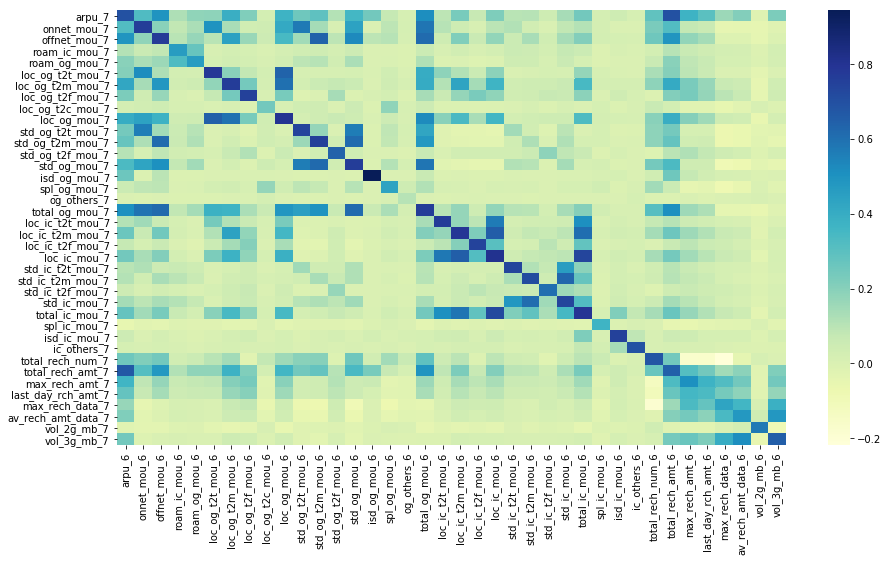

In [59]:
# Plot the correlation matrix for all the variables across each month
plt.figure(figsize=(15, 8))
sns.heatmap(data_6v7, cmap="YlGnBu")
plt.show()

Looking at the diagonal of the correlation matrix of 'month6' variables v. 'month7' variables, we see that there is significant correlation between each of the variables across both the month in the good phase. In such a case, let's combine these 2 sets of columns by taking their average, which will represent a common set of variables for the 'good phase'<br>

**Creating derived features for the good phase**

In [60]:
# function to calculate the average of common variables across months 6 and 7 and add a common column for the 'good phase'
ls = []
for i in range(len(ls1)):
    refined_telecom[ls1[i][:-1]+'gp_avg'] = (refined_telecom[ls2[i]]+refined_telecom[ls1[i]])/2

In [61]:
refined_telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,isd_ic_mou_gp_avg,ic_others_gp_avg,total_rech_num_gp_avg,total_rech_amt_gp_avg,max_rech_amt_gp_avg,last_day_rch_amt_gp_avg,max_rech_data_gp_avg,av_rech_amt_data_gp_avg,vol_2g_mb_gp_avg,vol_3g_mb_gp_avg
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,3.5,307.0,252.0,252.0,252.0,252.0,15.725,117.165
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,0.915,0.00,6.5,229.0,99.0,33.5,77.0,77.0,54.035,0.000
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0.000,0.24,5.5,273.0,83.0,80.0,28.0,28.0,0.000,0.000
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0.000,0.00,20.0,519.0,122.0,25.0,77.0,88.5,178.000,375.475
9,7001864400,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,...,18.300,0.00,3.0,207.5,132.0,132.0,77.0,77.0,3.685,0.000


In [62]:
#Let's now delete the month 6 and 7 columns as we're capturing their variance in the good phase columns created
refined_telecom = refined_telecom.drop(ls1, axis =1)
refined_telecom = refined_telecom.drop(ls2, axis =1)

In [63]:
refined_telecom.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,isd_ic_mou_gp_avg,ic_others_gp_avg,total_rech_num_gp_avg,total_rech_amt_gp_avg,max_rech_amt_gp_avg,last_day_rch_amt_gp_avg,max_rech_data_gp_avg,av_rech_amt_data_gp_avg,vol_2g_mb_gp_avg,vol_3g_mb_gp_avg
0,7000842753,213.803,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,0.000,0.00,3.5,307.0,252.0,252.0,252.0,252.0,15.725,117.165
1,7001865778,268.321,7.68,304.76,0.0,0.0,7.68,291.86,0.0,0.00,...,0.915,0.00,6.5,229.0,99.0,33.5,77.0,77.0,54.035,0.000
4,7000142493,238.174,83.89,124.26,0.0,0.0,83.89,124.26,0.0,0.00,...,0.000,0.24,5.5,273.0,83.0,80.0,28.0,28.0,0.000,0.000
8,7001524846,137.362,35.08,136.48,0.0,0.0,12.49,50.54,0.0,7.15,...,0.000,0.00,20.0,519.0,122.0,25.0,77.0,88.5,178.000,375.475
9,7001864400,170.231,22.43,78.34,0.0,0.0,22.43,34.93,0.0,0.00,...,18.300,0.00,3.0,207.5,132.0,132.0,77.0,77.0,3.685,0.000


#### Checking the Churn Rate

In [64]:
# Let's check the share of the 2 classes in our label column
100*(refined_telecom['churn'].value_counts()/len(refined_telecom))

0    91.549806
1     8.450194
Name: churn, dtype: float64

The churn rate is about 8.5%

Let's **define a function 'box_distribution'** that will create a box plot comparison for churners v. non-churners across the 2 phases: 'Good Phase' and 'Action Phase'

In [65]:
# create function to anlyze the features across 6th, 7th and 8th month
def box_distribution(var):
    plt.rcParams["figure.figsize"] = [15, 4]
    fig = plt.figure()
    f,axes = plt.subplots(nrows=1, ncols=2)
    sns.boxplot(data=refined_telecom, y=var + "_gp_avg", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0]).set_title('Good Phase')
    sns.boxplot(data=refined_telecom, y=var + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1]).set_title('Action Phase')

**Analyzing whether there is an impact in outgoing calls for churners v. non churners across the different phases**

In [66]:
# identifying the outgoing call columns
refined_telecom.columns[refined_telecom.columns.str.contains('.*og_')]

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'roam_og_mou_gp_avg', 'loc_og_t2t_mou_gp_avg',
       'loc_og_t2m_mou_gp_avg', 'loc_og_t2f_mou_gp_avg',
       'loc_og_t2c_mou_gp_avg', 'loc_og_mou_gp_avg', 'std_og_t2t_mou_gp_avg',
       'std_og_t2m_mou_gp_avg', 'std_og_t2f_mou_gp_avg', 'std_og_mou_gp_avg',
       'isd_og_mou_gp_avg', 'spl_og_mou_gp_avg', 'og_others_gp_avg',
       'total_og_mou_gp_avg'],
      dtype='object')

<Figure size 1080x288 with 0 Axes>

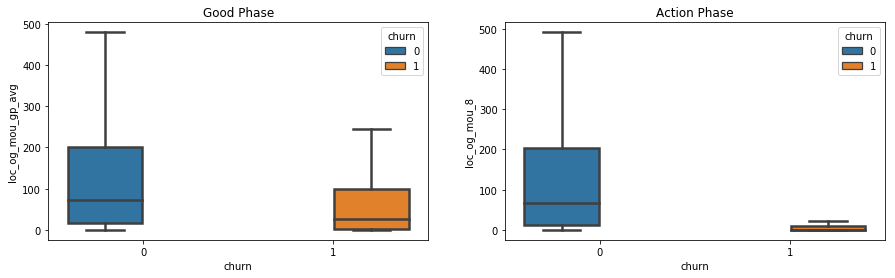

In [67]:
box_distribution('loc_og_mou')

We clearly see that the number of minutes spent on outgoing calls reduce for churners from the 'Good' phase to the 'Action' phase

**Checking how the recharge amounts change across the different phases**

In [68]:
# identifying the recharge columns
refined_telecom.columns[refined_telecom.columns.str.contains('rech_amt')]

Index(['total_rech_amt_8', 'max_rech_amt_8', 'av_rech_amt_data_8',
       'total_rech_amt_gp_avg', 'max_rech_amt_gp_avg',
       'av_rech_amt_data_gp_avg'],
      dtype='object')

<Figure size 1080x288 with 0 Axes>

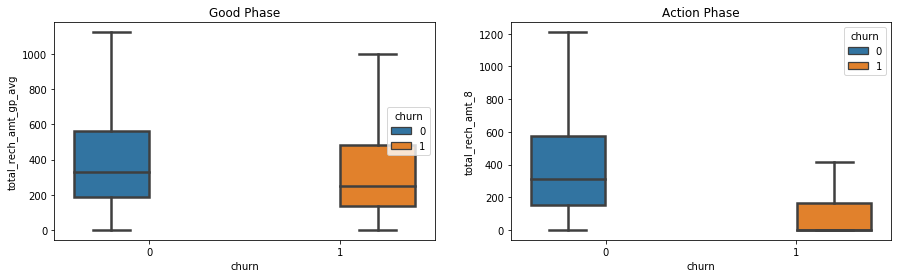

In [69]:
box_distribution('total_rech_amt')

**Let's now check how the revenue per user changes across the different phases for both the churners and no-churners**

In [70]:
# identifying the recharge columns
refined_telecom.columns[refined_telecom.columns.str.contains('.*arpu')]

Index(['arpu_8', 'arpu_gp_avg'], dtype='object')

<Figure size 1080x288 with 0 Axes>

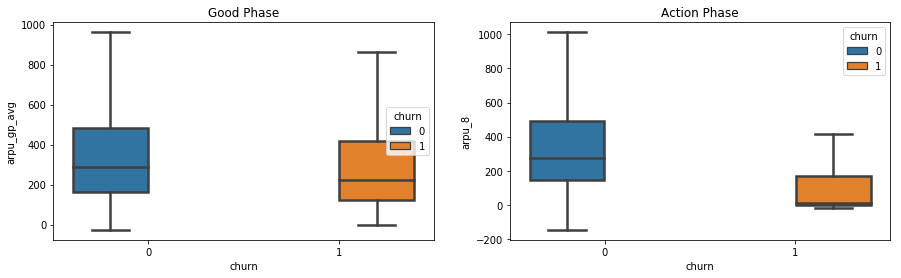

In [71]:
box_distribution('arpu')

The average revenue per user looks like another such feature that clearly gets impacted across the different phases for the churners

Looking at the trends above, we clearly see that there are certain distinct features that get impacted across the different phases for the users that are potentially going to churn

### Feature Scaling Standardisation

In [72]:
# Normalising continuous features
df = refined_telecom.drop(['churn','mobile_number'],axis=1)

In [73]:
normalized_df=(df-df.mean())/df.std()
refined_telecom = refined_telecom.drop(df.columns, 1)
refined_telecom = pd.concat([refined_telecom,normalized_df],axis=1)

In [74]:
refined_telecom.head()

,mobile_number,churn,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,...,isd_ic_mou_gp_avg,ic_others_gp_avg,total_rech_num_gp_avg,total_rech_amt_gp_avg,max_rech_amt_gp_avg,last_day_rch_amt_gp_avg,max_rech_data_gp_avg,av_rech_amt_data_gp_avg,vol_2g_mb_gp_avg,vol_3g_mb_gp_avg
0,7000842753,1,-0.376352,-0.374967,-0.562695,-0.134409,-0.151372,-0.285599,-0.559665,-0.302756,...,-0.133971,-0.084340,-0.813734,-0.315209,0.919079,1.947612,1.566553,0.531793,-0.479170,-0.350847
1,7001865778,0,-0.231852,-0.350430,0.351088,-0.134409,-0.151372,-0.245570,1.096917,-0.302756,...,-0.120505,-0.084340,-0.363392,-0.508131,-0.359595,-0.488118,-0.300969,-0.524061,-0.358724,-0.490638
4,7000142493,0,-0.311756,-0.106949,-0.190118,-0.134409,-0.151372,0.151649,0.145628,-0.302756,...,-0.133971,-0.065058,-0.513506,-0.399303,-0.493313,0.030241,-0.823875,-0.819700,-0.528609,-0.490638
8,7001524846,0,-0.578958,-0.262891,-0.153478,-0.134409,-0.151372,-0.220499,-0.272803,-0.302756,...,-0.133971,-0.084340,1.663152,0.209142,-0.167376,-0.582872,-0.300969,-0.454676,0.031018,-0.042654
9,7001864400,0,-0.491839,-0.303306,-0.327803,-0.134409,-0.151372,-0.168691,-0.361404,-0.302756,...,0.135350,-0.084340,-0.888792,-0.561308,-0.083803,0.609911,-0.300969,-0.524061,-0.517023,-0.490638


## Model Building

### Splitting Data into Training and Test Sets

In [75]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = refined_telecom.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = refined_telecom[['churn']]

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [77]:
X_train.shape

(21264, 77)

We see that the number of variables in the dataset are too many, let's using Principal Component Analysis to reduce the number of variables that we need to use for model building while still ensuring that we are capturing enough variance in the data

### Principal Component Analysis

In [78]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [79]:
# Performing PCA on the x variables
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [80]:
pca.components_[0]

array([ 0.21684787,  0.15419138,  0.18516962,  0.0373842 ,  0.04965753,
        0.12406091,  0.17299784,  0.09359521,  0.03001458,  0.19056989,
        0.09736104,  0.1054772 ,  0.03866022,  0.13149593,  0.00930582,
        0.04484371,  0.0024073 ,  0.21325555,  0.09538821,  0.13895977,
        0.06733582,  0.15668752,  0.06595221,  0.07368609,  0.03042379,
        0.09308106,  0.17527035, -0.01177845,  0.03212615,  0.01631587,
        0.09561903,  0.21157166,  0.13976224,  0.10404605,  0.07206793,
       -0.00601762,  0.0684627 ,  0.04733685,  0.07097158,  0.22112438,
        0.15881741,  0.18378724,  0.04094966,  0.05577606,  0.12647984,
        0.1717592 ,  0.09703268,  0.02826805,  0.19102914,  0.0993865 ,
        0.1044909 ,  0.04605727,  0.13193728,  0.00833909,  0.04205219,
        0.00771805,  0.21671851,  0.09226548,  0.13928825,  0.06341438,
        0.15354406,  0.06307494,  0.06672075,  0.03391673,  0.08721939,
        0.17004363, -0.00103712,  0.03132403,  0.01589388,  0.10

Let's have a look at what variables dominate each of the principal components in terms of their weightage of the linear combinations

#### Looking at the screeplot to assess the number of needed principal components

In [81]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,Feature
0,0.216848,0.000830,0.124771,-0.034615,-0.057233,arpu_8
1,0.154191,0.165847,-0.008040,-0.095996,0.281990,onnet_mou_8
2,0.185170,0.110044,0.017657,-0.006204,-0.238439,offnet_mou_8
3,0.037384,0.017302,0.045012,0.049234,0.045431,roam_ic_mou_8
4,0.049658,0.047826,0.071969,0.018482,0.000671,roam_og_mou_8


In [82]:
pca.explained_variance_ratio_

array([1.67904246e-01, 8.52810068e-02, 7.14232948e-02, 5.45461056e-02,
       3.79319816e-02, 3.73946807e-02, 3.18683972e-02, 3.05089119e-02,
       3.01290223e-02, 2.85031765e-02, 2.41611181e-02, 2.30208044e-02,
       2.23779490e-02, 2.17600179e-02, 2.16136669e-02, 2.05791413e-02,
       1.91476403e-02, 1.85079320e-02, 1.70452682e-02, 1.48306961e-02,
       1.47772126e-02, 1.41777683e-02, 1.18627263e-02, 1.14604028e-02,
       1.08062875e-02, 9.94714544e-03, 9.67246859e-03, 9.27825927e-03,
       8.92651595e-03, 8.47002030e-03, 8.30079979e-03, 8.03627210e-03,
       7.46319615e-03, 7.24114191e-03, 5.73333543e-03, 5.42565048e-03,
       5.28800571e-03, 5.22958284e-03, 5.07235619e-03, 4.56345310e-03,
       4.25596690e-03, 4.00750213e-03, 3.86673822e-03, 3.49015400e-03,
       3.33200496e-03, 3.28819836e-03, 3.21358357e-03, 3.15021948e-03,
       3.02339425e-03, 2.96972731e-03, 2.64108496e-03, 2.56189108e-03,
       2.28733580e-03, 1.93500187e-03, 1.82236828e-03, 1.56761663e-03,
      

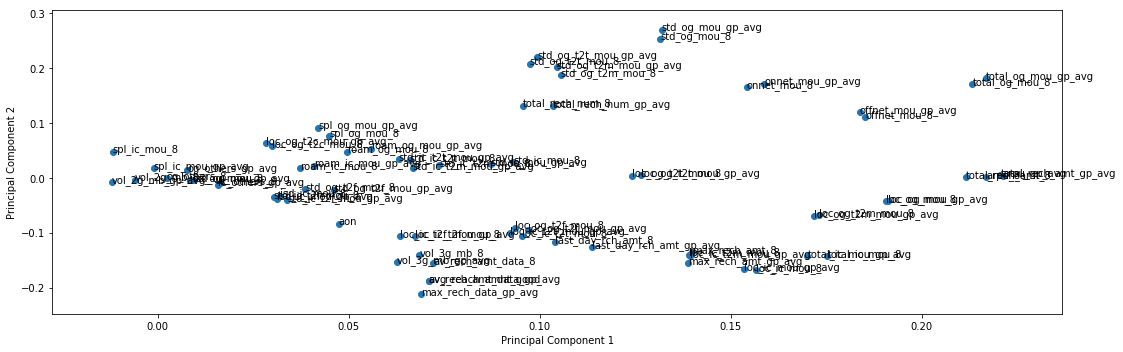

In [83]:
%matplotlib inline
fig = plt.figure(figsize = (15,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal components

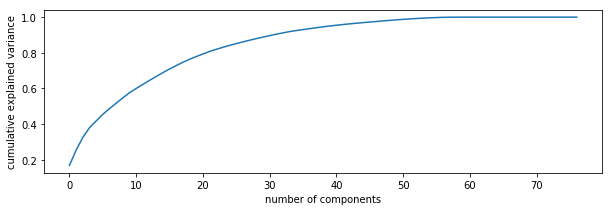

In [84]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We observe that close to 30 principal components are able to explain approximately 90% of variance. However, let's take a different approach to identify the number of components to take. <br>Let's identify the **number of components that can explain 90% of the data**

In [85]:
pca_again = PCA(0.9)

In [86]:
pca_again

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now apply the principal component transformation on our original dataset

In [87]:
x_pca = pca_again.fit_transform(X_train)
x_pca.shape

(21264, 32)

In [88]:
pc = pd.DataFrame(x_pca)

We see that 32 principal components explain upto 90% of variance in the data, let's use these for our final dataset

In [89]:
pcs_churn = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4], 'PC6':pc[5],'PC7':pc[6], 'PC8':pc[7],
                          'PC9':pc[8], 'PC10':pc[9], 'PC11':pc[10],'PC12':pc[11], 'PC13':pc[12], 'PC14':pc[13], 'PC15':pc[14],
                          'PC16':pc[15], 'PC17':pc[16], 'PC18':pc[17], 'PC19':pc[18], 'PC20':pc[19], 'PC21':pc[20], 
                          'PC22':pc[21], 'PC23':pc[22], 'PC24':pc[23], 'PC25':pc[24], 'PC26':pc[25], 'PC27':pc[26], 
                          'PC28':pc[27], 'PC29':pc[28], 'PC30':pc[29], 'PC31':pc[30], 'PC32':pc[31]})

In [90]:
pcs_churn.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-3.616860,0.534214,-1.328880,0.031157,0.263813,-0.544774,0.268945,0.433978,-0.147719,0.002473,...,-0.071324,0.161013,-0.141238,0.068731,-0.081303,0.221987,0.444372,-0.227446,-0.215629,0.045914
1,0.414150,-0.090307,-1.420296,-1.477115,1.329718,-0.533372,-0.925626,-1.133493,0.443045,0.330137,...,0.028283,1.083082,0.339957,-1.818038,-0.952927,-0.553016,0.298995,-0.306048,0.278759,-0.008994
2,-1.926037,-0.427933,-0.344188,-0.194688,-0.634024,1.363868,-0.709334,-1.435092,0.302294,1.013191,...,-0.856012,-0.465830,0.001260,-2.426472,-1.489244,-1.625665,0.252395,-0.391416,-0.445850,-0.602726
3,-0.158345,-3.056485,1.857057,-0.188903,0.681901,-0.420450,-0.279139,0.993380,-0.271888,1.601539,...,0.894564,1.207302,0.320218,-0.305490,0.145263,0.086207,-0.062774,0.174583,0.033987,-0.070103
4,-0.837068,1.516884,0.789959,0.139394,-0.316856,0.811385,0.405085,-0.500763,-0.172761,-0.400030,...,-0.067567,0.048256,0.256574,0.167666,0.320547,0.173335,0.075951,-0.338870,0.538405,0.593690


Let's have a look at the **correlation matrix of the principal components** to see if we have tackled the problem of multicollinearity

In [91]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(x_pca.transpose())

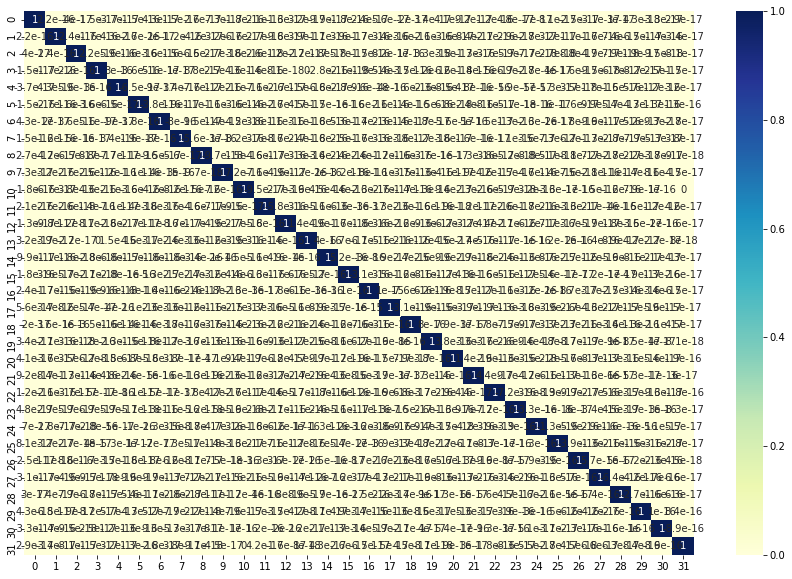

In [92]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True, cmap="YlGnBu")

We can see that we have dealt with the issue of multicollinearity as the correlation between all principal components is nearly 0. Now that we have performed PCA to remove multicollinearity and still kept 95% of variance in the data intact, we can go ahead with the process of model building using these principal components

Let's try out different learning algorithms to identify which would produce the best results

### Model 1: Logistic Regression

In [93]:
y_train.shape

(21264, 1)

In order to deal with **Class Imbalance** in the dataset, we will define the 'class_weight' argument in the Logistic Regression algorithm. From the definition in the sklearn documentation, setting calss_weight = 'balanced' would give the classes that have high frequencies receive low weights and classes with low frequencies receive high weights

In [94]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logm1=LogisticRegression(class_weight='balanced') 

model_lr = logm1.fit(pcs_churn,y_train)

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Prediction on train set**

In [95]:
# Getting the predicted values on the train set
y_train_pred = model_lr.predict_proba(pcs_churn)[:,1]

In [96]:
pd.DataFrame(y_train_pred).head()

,0
0,0.741088
1,0.126704
2,0.317439
3,0.073216
4,0.294395


In [97]:
y_train.loc[4,'churn']

0

In [98]:
# Creating a dataframe with predicted probabilities
y_train_pred_final = pd.concat([pd.DataFrame(y_train.reset_index().churn),pd.DataFrame(y_train_pred)], axis = 1)
y_train_pred_final.columns = ['Conv', 'Conv_Prob']
y_train_pred_final['Row Number'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number
0,1,0.741088,82934
1,0,0.126704,13186
2,0,0.317439,31478
3,0,0.073216,55805
4,0,0.294395,34867


Now that we've built the logistic regression model, we can run the model to get our first set of predictions. However, let's first **find the optimal cut off probability** for classification purposes.

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.741088,82934,1,1,1,1,1,1,1,1,0,0
1,0,0.126704,13186,1,1,0,0,0,0,0,0,0,0
2,0,0.317439,31478,1,1,1,1,0,0,0,0,0,0
3,0,0.073216,55805,1,0,0,0,0,0,0,0,0,0
4,0,0.294395,34867,1,1,1,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.084744     1.000000     0.000000
0.1   0.1  0.353367     0.968368     0.296424
0.2   0.2  0.490030     0.950610     0.447385
0.3   0.3  0.603743     0.925083     0.573990
0.4   0.4  0.695495     0.892342     0.677269
0.5   0.5  0.781744     0.837403     0.776590
0.6   0.6  0.850922     0.774695     0.857980
0.7   0.7  0.900536     0.688679     0.920152
0.8   0.8  0.921228     0.406215     0.968914
0.9   0.9  0.918030     0.114317     0.992447


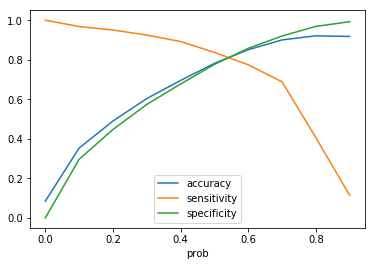

In [101]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, we can see that 0.5 is about the optimum point to consider as a cutoff probability.

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Conv,Conv_Prob,Row Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.741088,82934,1,1,1,1,1,1,1,1,0,0,1
1,0,0.126704,13186,1,1,0,0,0,0,0,0,0,0,0
2,0,0.317439,31478,1,1,1,1,0,0,0,0,0,0,0
3,0,0.073216,55805,1,0,0,0,0,0,0,0,0,0,0
4,0,0.294395,34867,1,1,1,0,0,0,0,0,0,0,0


Let's check the **area under the ROC curve** now, to see if we have a good enough model.<br>
An ROC curve demonstrates the following things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

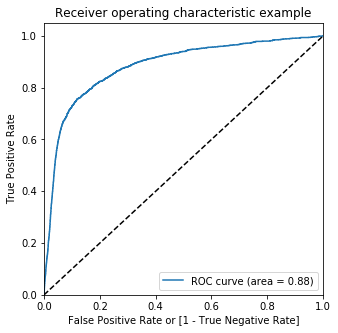

In [104]:
draw_roc(y_train_pred_final.Conv, y_train_pred_final.Conv_Prob)

Let's check the overall accuracy.

In [105]:
metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted)

0.7817437923250564

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conv, y_train_pred_final.final_predicted )
confusion

array([[15114,  4348],
       [  293,  1509]], dtype=int64)

Calculating other metrics apart from accuracy on the training set

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity = ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('Positive Rate = ', FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value = ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value = ', TN / float(TN+ FN))

from sklearn.metrics import precision_score, recall_score
#Precision Score
print('Precision Score = ', precision_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted))
#Recall Score
print('Recall Score = ',recall_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted))
#Accuracy Score
print('Accuracy Score = ',metrics.accuracy_score(y_train_pred_final.Conv, y_train_pred_final.final_predicted))


Sensitivity =  0.8374028856825749
Specificity =  0.7765902784914192
Positive Rate =  0.22340972150858082
Positive predictive value =  0.2576404302543964
Negative predictive value =  0.9809826702148374
Precision Score =  0.2576404302543964
Recall Score =  0.8374028856825749
Accuracy Score =  0.7817437923250564


**Prediction on Test Set**

Let's begin with applying PCA on the test data - 32 principal components

In [109]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_again.transform(X_test)
df_test_pca.shape

(9114, 32)

In [110]:
#Making prediction on the test data
y_test_pred = model_lr.predict_proba(df_test_pca)[:,1]

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Adding Row Number to a row, which will be used as an identifier for the Lead Number
y_test_df['Row Number'] = y_test_df.index

In [113]:
y_test_df.head()

,churn,Row Number
30725,0,30725
27990,0,27990
51121,1,51121
25690,0,25690
88110,0,88110


In [114]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

y_pred_final.head()

,churn,Row Number,Conv_Prob
0,0,30725,0.126119
1,0,27990,0.005437
2,1,51121,0.833444
3,0,25690,0.199520
4,0,88110,0.033421


Let's add our prediction based on the optimal probability value that was identified earlier

In [116]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [117]:
y_pred_final.head()

,churn,Row Number,Conv_Prob,final_predicted
0,0,30725,0.126119,0
1,0,27990,0.005437,0
2,1,51121,0.833444,1
3,0,25690,0.199520,0
4,0,88110,0.033421,0


Let's check all the other evaluation parameters on the test set

In [118]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )

# Let's check the overall accuracy.
print('Accuracy Score = ',metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))


TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity = ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('Positive Rate = ', FP/ float(TN+FP))
# Positive predictive value 
print ('Positive predictive value = ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value = ', TN / float(TN+ FN))

from sklearn.metrics import precision_score, recall_score
#Precision Score
print('Precision Score = ', precision_score(y_pred_final.churn, y_pred_final.final_predicted))
#Recall Score
print('Recall Score = ',recall_score(y_pred_final.churn, y_pred_final.final_predicted))

Accuracy Score =  0.7778143515470705
Sensitivity =  0.8274509803921568
Specificity =  0.7732662594322673
Positive Rate =  0.22673374056773266
Positive predictive value =  0.2505938242280285
Negative predictive value =  0.9799635701275046
Precision Score =  0.2505938242280285
Recall Score =  0.8274509803921568


### Model 2: Linear SVM

In [119]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [120]:
pcs_churn.shape

(21264, 32)

In [121]:
y_train.shape

(21264, 1)

In [122]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [123]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
# Also, in order to hande class imbalance, we'll set the class_weight = 'balanced'
model = SVC(C = 1, class_weight='balanced')

# fit
model.fit(pcs_churn, y_train)

# predict
y_pred = model.predict(df_test_pca)

In [124]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [125]:
y_test_array = np.array(y_test['churn'])
y_test_array

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [126]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test_array, y_pred=y_pred)

array([[7306, 1043],
       [ 180,  585]], dtype=int64)

In [127]:
confusion = metrics.confusion_matrix(y_true=y_test_array, y_pred=y_pred)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test_array, y_pred))

# precision
print("precision", metrics.precision_score(y_test_array, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_array, y_pred))

# specificity 
print("specificity", 8287/(8287+62))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))


accuracy 0.8658108404652184
precision 0.3593366093366093
recall 0.7647058823529411
specificity 0.9925739609534076
Sensitivity =  0.7647058823529411


#### Hyperparmeter Tuning for Linear SVM using Grid Search

We want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In our case, we will be optimizing towards **sensitivity/recall** as it is important that we ensure we're not missing out on predicting any potential churners

In [128]:
# creating a KFold object with 4 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100]}

model = SVC(class_weight='balanced')

# set up grid search scheme
# note that we are still using the 4 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [129]:
# fit the model - it will fit 4 folds across all values of C
model_cv.fit(pcs_churn, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  5.2min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=1)

In [130]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,14.906862,1.232185,2.209138,0.211842,0.1,{'C': 0.1},0.766147,0.741419,0.717949,0.728953,0.738617,0.017933,2,0.773836,0.784615,0.782957,0.788593,0.782500,0.005405
1,12.129490,1.931214,1.824898,0.077548,1,{'C': 1},0.775056,0.739130,0.724942,0.749487,0.747154,0.018315,1,0.891353,0.895238,0.901675,0.889734,0.894500,0.004600
2,10.567396,0.762977,1.678785,0.086663,10,{'C': 10},0.737194,0.693364,0.668998,0.718686,0.704560,0.025761,3,0.950480,0.951648,0.947560,0.945247,0.948734,0.002504
3,12.177868,0.483162,1.098585,0.044000,100,{'C': 100},0.697105,0.643021,0.652681,0.673511,0.666579,0.020785,4,0.978566,0.972894,0.979607,0.973384,0.976113,0.003001


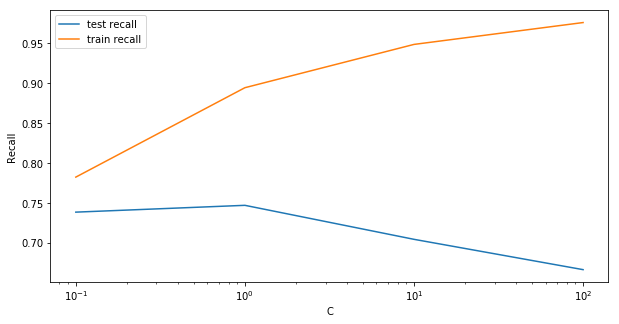

In [131]:
# plot of C versus train and test scores

plt.figure(figsize=(10, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

Let's now identify which is the most optimal value of C

In [132]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest recall score is {0} at C = {1}".format(best_score, best_C))

 The highest recall score is 0.7471536229972628 at C = 1


We see that the most optimal value of C is 1, beyond which the model starts to overfit. Let's now build the model

In [133]:
# model with the best value of C
model = SVC(C=best_C, class_weight='balanced')

# fit
model.fit(pcs_churn, y_train)

# predict
y_pred = model.predict(df_test_pca)

In [134]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test_array, y_pred=y_pred)

array([[7306, 1043],
       [ 180,  585]], dtype=int64)

In [135]:
confusion = metrics.confusion_matrix(y_true=y_test_array, y_pred=y_pred)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))


# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test_array, y_pred))

# precision
print("precision", metrics.precision_score(y_test_array, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_array, y_pred))

# specificity 
print("specificity", 8200/(8200+149))

Sensitivity =  0.7647058823529411
accuracy 0.8658108404652184
precision 0.3593366093366093
recall 0.7647058823529411
specificity 0.9821535513235118


### Model 3: Non-Linear SVM

**Build non-linear SVM by tuning hyperparameters**

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [136]:
# creating a KFold object with 4 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-3, 1e-4],
                     'C': [10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf", class_weight='balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(pcs_churn, y_train)                  


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.8min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.001, 0.0001], 'C': [10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [137]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,10.722212,0.365285,1.813196,0.029895,10,0.001,"{'C': 10, 'gamma': 0.001}",0.824053,0.803204,0.797203,0.782341,0.801700,0.014974,4,0.824095,0.830769,0.824472,0.836502,0.828959,0.005098
1,13.816227,0.967217,2.292165,0.264271,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.846325,0.821510,0.820513,0.800821,0.822292,0.016143,1,0.819660,0.830037,0.821559,0.837262,0.827129,0.007035
2,12.673020,0.228471,1.765558,0.162875,100,0.001,"{'C': 100, 'gamma': 0.001}",0.819599,0.787185,0.766900,0.790554,0.791060,0.018798,5,0.837398,0.838828,0.839767,0.835741,0.837934,0.001521
3,13.742413,1.353047,2.137808,0.228049,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.844098,0.816934,0.832168,0.788501,0.820425,0.020794,2,0.817443,0.828571,0.825200,0.836502,0.826929,0.006843
4,20.408416,0.921622,1.498255,0.044636,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.801782,0.750572,0.755245,0.772074,0.769918,0.020059,6,0.867701,0.864469,0.879097,0.860837,0.868026,0.006838
5,14.352035,0.463688,1.815682,0.057506,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",0.835189,0.807780,0.804196,0.782341,0.807377,0.018779,3,0.821138,0.833700,0.825929,0.838783,0.829887,0.006817


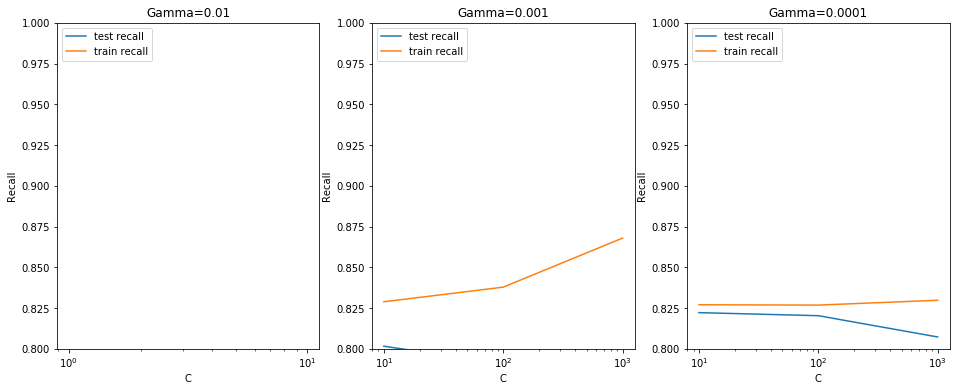

In [138]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')


Let's identify the most optimal hyperparameters - Gamma and C - that we should use for our model building

In [139]:
# printing the optimal recall score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8222924100674148 corresponding to hyperparameters {'C': 10, 'gamma': 0.0001}


Building and evaluating the model with the above selected hyperparameters

In [140]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf", class_weight='balanced')

model.fit(pcs_churn, y_train)
y_pred = model.predict(df_test_pca)

# metrics
print(metrics.confusion_matrix(y_test_array, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test_array, y_pred))
print("precision", metrics.precision_score(y_test_array, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred))

confusion = metrics.confusion_matrix(y_test_array, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))


[[7289 1060]
 [ 208  557]] 

accuracy 0.8608733816107088
precision 0.34446505875077305
sensitivity/recall 0.7281045751633987
Sensitivity =  0.7281045751633987


### Model 4: Decision Trees

Let's build a decision tree model with default hyperparameters and see how it performs, before we proceed with hyperparameter tuning

In [141]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
# In order to take into account class imbalance, we'll set class_weight = 'balanced'
dt_default = DecisionTreeClassifier(max_depth=5, class_weight = 'balanced')
dt_default.fit(pcs_churn, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

In [143]:
# Printing confusion matrix
print(confusion_matrix(y_test_array,y_pred_default))

# metrics
print("accuracy", metrics.accuracy_score(y_test_array, y_pred_default))
print("precision", metrics.precision_score(y_test_array, y_pred_default))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred_default))

confusion = metrics.confusion_matrix(y_test_array,y_pred_default)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))


[[6646 1703]
 [ 223  542]]
accuracy 0.7886767610269915
precision 0.24142538975501113
sensitivity/recall 0.7084967320261438
Sensitivity =  0.7084967320261438


**Hyperparameter tuning**

Let's use grid search cv menthod to tune the following hyperparameters to end up with the most optimal set of hyperparameters:
- max_depth
- min_samples_leaf
- min_samples_split

**Hyperparameter tuning - Tuning min_samples_leaf**

In [144]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, class_weight = 'balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(pcs_churn, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

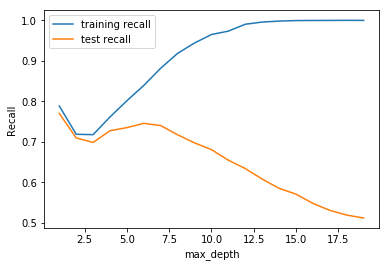

In [145]:
# scores of GridSearch CV
scores = tree.cv_results_

# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 7, after which the test score gradually reduces.

**Hyperparameter tuning - Tuning min_samples_leaf**

In [146]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 1000, 50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, class_weight = 'balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(pcs_churn, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

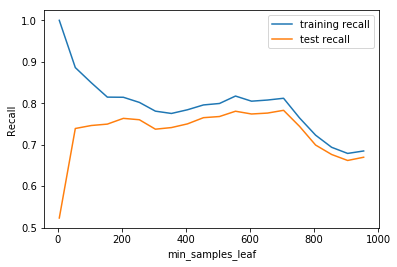

In [147]:
# scores of GridSearch CV
scores = tree.cv_results_

# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()


We observe that the test recall begins to drop as min_sample_leaf > 700

**Hyperparameter tuning - Tuning min_samples_split**

In [148]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_split': range(5, 1000, 50)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(pcs_churn, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

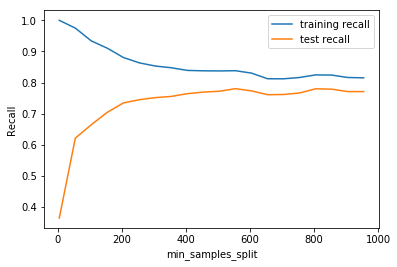

In [149]:
# scores of GridSearch CV
scores = tree.cv_results_

# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

**Tuning multiple hyperparameters at a go**

In [150]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 9, 1),
    'min_samples_leaf': range(400, 800, 100),
    'min_samples_split': range(400, 800, 100),
    'criterion': ["gini"]
}

n_folds = 4

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall')

# Fit the grid search to the data
grid_search.fit(pcs_churn,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 9), 'min_samples_leaf': range(400, 800, 100), 'min_samples_split': range(400, 800, 100), 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [151]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

# printing the optimal recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.778024190222065
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=700, min_samples_split=400,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


**Running the model with best parameters obtained from grid search.**

In [152]:
# model with optimal hyperparameters
dt_hyp = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=700,
                                  min_samples_split=400, class_weight = 'balanced')
dt_hyp.fit(pcs_churn, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=700, min_samples_split=400,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [153]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_hyp.predict(df_test_pca)

In [154]:
# Printing confusion matrix
print(confusion_matrix(y_test_array,y_pred_default))

# metrics
print("accuracy", metrics.accuracy_score(y_test_array, y_pred_default))
print("precision", metrics.precision_score(y_test_array, y_pred_default))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred_default))

confusion = metrics.confusion_matrix(y_test_array,y_pred_default)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))


[[5937 2412]
 [ 160  605]]
accuracy 0.71779679613781
precision 0.20053032814053695
sensitivity/recall 0.7908496732026143
Sensitivity =  0.7908496732026143


### Model 5: Random Forest Classification

Let's build the RF model with default hyperparameters, but by setting class_weight as balanced to take into account class imbalance in the dataset

In [155]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight = 'balanced')

# fit
rfc.fit(pcs_churn,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [156]:
# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [157]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test_array,y_pred_default))

# metrics
print("accuracy", metrics.accuracy_score(y_test_array, y_pred_default))
print("precision", metrics.precision_score(y_test_array, y_pred_default))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred_default))


confusion = metrics.confusion_matrix(y_test_array,y_pred_default)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))

[[8258   91]
 [ 631  134]]
accuracy 0.9207812157120913
precision 0.5955555555555555
sensitivity/recall 0.17516339869281045
Sensitivity =  0.17516339869281045


**Hyperparameter tuning**

Let's use grid search cv menthod to tune the following hyperparameters to end up with the most optimal set of hyperparameters:
- max_depth
- min_samples_leaf
- min_samples_split
- n_estimators
- max_features

In [158]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,9),
    'min_samples_leaf': range(500, 800, 100),
    'min_samples_split': range(500, 800, 100),
    'n_estimators': range(50, 150, 50), 
    'max_features': [4, 5]
}
# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')

# Fit the grid search to the data
grid_search.fit(pcs_churn, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 9), 'min_samples_leaf': range(500, 800, 100), 'min_samples_split': range(500, 800, 100), 'n_estimators': range(50, 150, 50), 'max_features': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [159]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.7536177192660674 using {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 700, 'min_samples_split': 500, 'n_estimators': 50}


**Fitting the final model with the best parameters obtained from grid search**

In [160]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=700, 
                             min_samples_split=700,
                             max_features=5,
                             n_estimators=50, class_weight='balanced')

# fit
rfc.fit(pcs_churn,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=700,
            min_samples_split=700, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [161]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [162]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test_array,y_pred_default))

# metrics
print("accuracy", metrics.accuracy_score(y_test_array, y_pred_default))
print("precision", metrics.precision_score(y_test_array, y_pred_default))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred_default))


confusion = metrics.confusion_matrix(y_test_array,y_pred_default)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity = ', TP / float(TP+FN))

[[6979 1370]
 [ 200  565]]
accuracy 0.8277375466315559
precision 0.29198966408268734
sensitivity/recall 0.738562091503268
Sensitivity =  0.738562091503268


### The most optimal model to use
We would be deciding the optimal model that predicts Customer Churn based on the evaluation parmeters on the training set. Accuracy stands as an important evaluation parameter as we want to ensure we're predicting as many labels correctly as possible. However, considering the business probelem - it is **very important that we're not missing out on any potential churners**. This means we need to ensure that our model is flagging every potential churner, and hence the **sensitivity** becomes a very important evaluation metric.

Based on all the models that we've built above, the **first model based on logistic regression** is the most optimal model because it has the highest value of sensitivity (0.83) and a reasonably high value of accuracy (~0.78) too!

### Identifying important variables that are strong predictors of churn

Now that we've identified the optimal model for predicting whether a user will churn or not, let's proceed with identifying the major factors contributing to whether the user will churn or not

In this case, considering we need to find the most important features, we'll be using the dataset before applying PCA on it (the one with the original set of features)

In [163]:
refined_telecom.columns.values

array(['mobile_number', 'churn', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'avg_reach_amnt_good',
       'arpu_gp_avg', 'onnet_mou_gp_avg', 'offnet_mou_gp_avg',
       'roam_ic_mou_gp_avg', 'roam_og_mou_gp_avg',
       'loc_og_t2t_mou_gp_avg', 'loc_og_t2m_mou_gp_avg',
       'loc_og_t2f_mou_gp_av

In [164]:
refined_telecom.head()

,mobile_number,churn,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,...,isd_ic_mou_gp_avg,ic_others_gp_avg,total_rech_num_gp_avg,total_rech_amt_gp_avg,max_rech_amt_gp_avg,last_day_rch_amt_gp_avg,max_rech_data_gp_avg,av_rech_amt_data_gp_avg,vol_2g_mb_gp_avg,vol_3g_mb_gp_avg
0,7000842753,1,-0.376352,-0.374967,-0.562695,-0.134409,-0.151372,-0.285599,-0.559665,-0.302756,...,-0.133971,-0.084340,-0.813734,-0.315209,0.919079,1.947612,1.566553,0.531793,-0.479170,-0.350847
1,7001865778,0,-0.231852,-0.350430,0.351088,-0.134409,-0.151372,-0.245570,1.096917,-0.302756,...,-0.120505,-0.084340,-0.363392,-0.508131,-0.359595,-0.488118,-0.300969,-0.524061,-0.358724,-0.490638
4,7000142493,0,-0.311756,-0.106949,-0.190118,-0.134409,-0.151372,0.151649,0.145628,-0.302756,...,-0.133971,-0.065058,-0.513506,-0.399303,-0.493313,0.030241,-0.823875,-0.819700,-0.528609,-0.490638
8,7001524846,0,-0.578958,-0.262891,-0.153478,-0.134409,-0.151372,-0.220499,-0.272803,-0.302756,...,-0.133971,-0.084340,1.663152,0.209142,-0.167376,-0.582872,-0.300969,-0.454676,0.031018,-0.042654
9,7001864400,0,-0.491839,-0.303306,-0.327803,-0.134409,-0.151372,-0.168691,-0.361404,-0.302756,...,0.135350,-0.084340,-0.888792,-0.561308,-0.083803,0.609911,-0.300969,-0.524061,-0.517023,-0.490638


In [165]:
refined_telecom.shape

(30378, 79)

The dataset has already undergone pre-modelling procedures of null value treatment, outlier analysis and derivation of more relevant variables. Also, we have treated multicollinearity in the data (the collinearity that existed between the variables in the 2 months in the 'Good Phase')

So we can proceed with creating a classification model to understand what are the most important features that determine whether a user will churn or not

### Random Forest Modelling for Feature Importance

Initially, we had undergone the process of standardizing the data and then splitting it into training and testing sets. The respective sets of data are: X_train, y_train, X_test, y_test

In [166]:
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (21264, 77)
y_train Shape:  (21264, 1)
X_test Shape:  (9114, 77)
y_test Shape:  (9114, 2)


Let's build the RF model by **tuning the following hyperparameters** using Grid Search CV - taking into account class imbalance using the class_weight = 'balanced' argumernt within the Random Forest Classifier:
- max_depth
- min_samples_leaf
- min_samples_split
- n_estimators
- max_features

In [167]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20],
    'min_samples_leaf': range(500, 1000, 200),
    'min_samples_split': range(500, 1000, 200),
    'n_estimators': [50,100], 
    'max_features': range(1, 50, 25)
}

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20], 'min_samples_leaf': range(500, 1000, 200), 'min_samples_split': range(500, 1000, 200), 'n_estimators': [50, 100], 'max_features': range(1, 50, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [168]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.7702610703745159 using {'max_depth': 10, 'max_features': 26, 'min_samples_leaf': 500, 'min_samples_split': 700, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search**

In [169]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=700, 
                             min_samples_split=900,
                             max_features=26,
                             n_estimators=50, class_weight = 'balanced')

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=26,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=700,
            min_samples_split=900, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [170]:
# predict
y_pred_default = rfc.predict(X_test)

In [171]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Printing confusion matrix
print(metrics.confusion_matrix(y_test_array, y_pred_default), "\n")

# metrics
print("accuracy", metrics.accuracy_score(y_test_array, y_pred_default))
print("precision", metrics.precision_score(y_test_array, y_pred_default))
print("sensitivity/recall", metrics.recall_score(y_test_array, y_pred_default))

[[7425  924]
 [ 198  567]] 

accuracy 0.8768926925608953
precision 0.38028169014084506
sensitivity/recall 0.7411764705882353


We can see that the random forest model works pretty well with an accuracy of over 87% and sensitivity close to 75%

### Now for the feature importances

Let's retrieve the feature importances from the model and see what are the most important variables that impact whether a customer will churn or not

In [172]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

#### Based on the model, the 10 most important features are:

In [173]:
feature_importances[:10].index.values

array(['loc_ic_mou_8', 'total_ic_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'av_rech_amt_data_8', 'last_day_rch_amt_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'vol_2g_mb_8',
       'max_rech_amt_8'], dtype=object)

Clearly, we can see that features such as minutes of usage, revenue, recharge amounts for data change significantly across the different phases for the churners, and give a very good indication of the customers looking to churn

This was also evident from the EDA that was done on the recharge and minutes of usage variables above. Let's have a look at how the minutes of usage and the data recharge amount change for churners v. no-churners across the good phase and the action phase

<Figure size 1080x288 with 0 Axes>

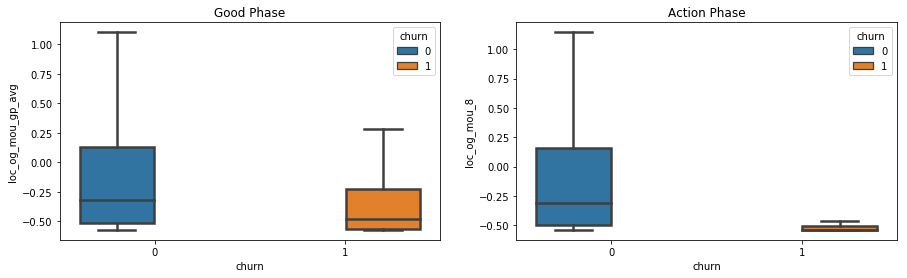

In [174]:
# Minutes of Usage
box_distribution('loc_og_mou')

<Figure size 1080x288 with 0 Axes>

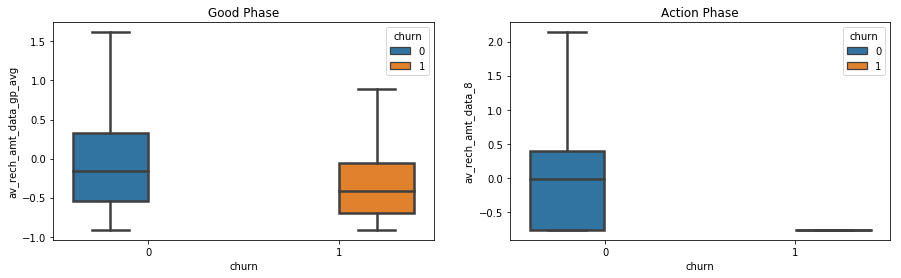

In [175]:
# Total Recharge Amount
box_distribution('av_rech_amt_data')

We clearly see that there is a significant drop in the variables across the different phases for customers who are going to churn, and hence act as clear indications of potential churners that the telecom company should be mindful of

### Recommendations to Reduce Churn
Based on our Random Forest model, the features that contribute most towards a user decideing to churn include:
- A drop in the minutes of voice calls in the action phase from the good phase
- The average revenue per user in the action phase
- the total recharge amounts per user in the action phase
- The volume of data used in the action phase

In order to tackle churn after having identified the customers most likely to churn in the action phase, the company can use serveral methods:
- Providing discounts on the data usage
- Providing additional data allocated to the user in the action phase
- In case the identified user has spent significant minutes in international calls, easen up the tariffs by providing special offers on international calls
- If there is an area/region seeing significant amount of churn, a potential reason for that could be the signal coverage which may be lacking in that area - this could be actioned upon by increasing network coverage in the area
- Additional services can be tied with the mobile plans such as music and gaming app subscriptions
- For customers heavily using the roaming facilities, easen up the roaming tariffs for them
- Introduce 'Loyalty Schemes' for customers which would be an added incentive for them to stick with the provider
